<a href="https://colab.research.google.com/github/Harish104/3/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All the necessary libraries and modules were imported.
# Dataset is imported and converted into data frame using pandas library.
import pandas as pd
df=pd. read_excel( '/content/Copy of loan.xlsx')
# First five rows of the data frame are displayed.
df. head ( )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Data frame's description is displayed.
df. describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: title={'center': 'Missing Values Percentage'}, ylabel='Percentage'>

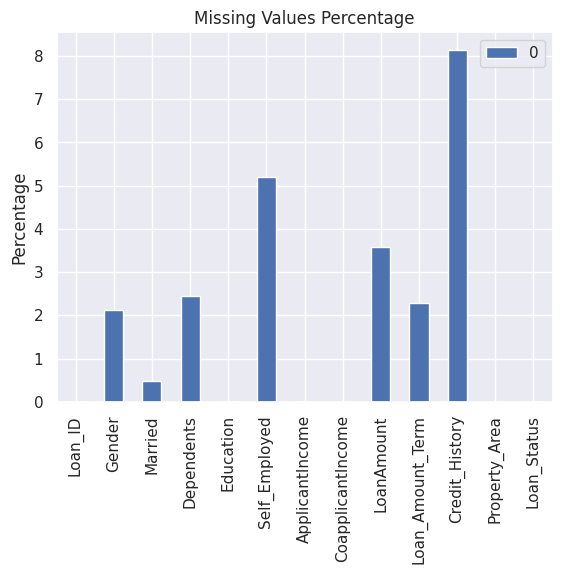

In [7]:
import seaborn as sns
import pandas as pd
sns.set()
miss_val_per=pd.DataFrame((df.isnull().sum()/len(df)*100))
miss_val_per.plot(kind="bar", title="Missing Values Percentage", ylabel="Percentage")

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_1=SimpleImputer (strategy="mean" )
imp_2=SimpleImputer (strategy="most_frequent")
imp_2. fit(df [ ['Gender']])
df ['Gender']=imp_2. fit_transform(df [ ['Gender']]). ravel()
imp_2. fit (df[['Married']])
df ['Married']=imp_2. fit_transform(df [['Married']]). ravel()
imp_2. fit(df [['Self_Employed']])
df ['Self_Employed']=imp_2.fit_transform(df [['Self_Employed']]). ravel()
df ['Dependents'] = pd. to_numeric(df ['Dependents'], errors='coerce')
imp_1. fit(df [['Dependents' ]])
df ['Dependents'] = np. round (imp_1. fit_transform(df [ ['Dependents']]). ravel())
imp_1. fit(df [['LoanAmount']]) # Removed extra space after LoanAmount
df ['LoanAmount'] = np. round (imp_1. fit_transform(df [ ['LoanAmount']]) . ravel()) # Removed extra space after LoanAmount
imp_1. fit(df [['Loan_Amount_Term']])
df ['Loan_Amount_Term'] = np. round (imp_1. fit_transform(df [['Loan_Amount_Term']]) .ravel())
imp_1. fit(df[['Credit_History']])
df ['Credit_History'] = np. round(imp_1. fit_transform(df [['Credit_History']]).ravel())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,1.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Education,0
Self_Employed,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Loan_Status,0
Dependents_1,0


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label encoder is used here to convert yes,no and Male,Female into binary @'s and 1's.
# Since we are analyzing the dataset numerically.
label_encoder = LabelEncoder()
for column in ["a", "ransation", "coupLoyed", "Loan Status"]:
    # get_dummies function is used to convert dependents column to binary values(0,1) and they are sub-divided in
    # dependents 1.0 and 2.0(since number is greater than 2)
    pass


# Verify the column names in your DataFrame
print(df.columns)

# Check if 'Dependents' and 'Property_Area' are present, if not skip get_dummies
if 'Dependents' in df.columns and 'Property_Area' in df.columns:
    df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Check if 'ApplicantIncome' and 'CoapplicantIncome' are present before creating 'TotalIncome'
if 'ApplicantIncome' in df.columns and 'CoapplicantIncome' in df.columns:
    # Using Feature Engineering we merge ApplicantIncome and CoapplicantIncome to TotalIncome
    df ['TotalIncome'] = df ['ApplicantIncome'] + df ['CoapplicantIncome']
    # Now, unnecessary ApplicantIncome and CoapplicantIncome columns were removed
    df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
df

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome'],
      dtype='object')


,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,LP001002,1,0,0,0,NaN,360.0,1.0,1,False,False,False,False,True,5849.0
1,LP001003,1,1,0,0,128.0,360.0,1.0,0,True,False,False,False,False,6091.0
2,LP001005,1,1,0,1,66.0,360.0,1.0,1,False,False,False,False,True,3000.0
3,LP001006,1,1,1,0,120.0,360.0,1.0,1,False,False,False,False,True,4941.0
4,LP001008,1,0,0,0,141.0,360.0,1.0,1,False,False,False,False,True,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,71.0,360.0,1.0,1,False,False,False,False,False,2900.0
610,LP002979,1,1,0,0,40.0,180.0,1.0,1,False,False,True,False,False,4106.0
611,LP002983,1,1,0,0,253.0,360.0,1.0,1,True,False,False,False,True,8312.0
612,LP002984,1,1,0,0,187.0,360.0,1.0,1,False,True,False,False,True,7583.0


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]
Accuracy Score: 0.7886178861788617

------------------------------------------------------------

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        43
           1       0.77      0.74      0.75        80

    accuracy                           0.68       123
   macro avg       0.65      0.66      0.66       123
weighted avg       0.69      0.68      0.69       123

Confusion Matrix:
[[25 18]
 [21 59]]
Accuracy Score: 0.6829268292682927

----------------------------------------------------------

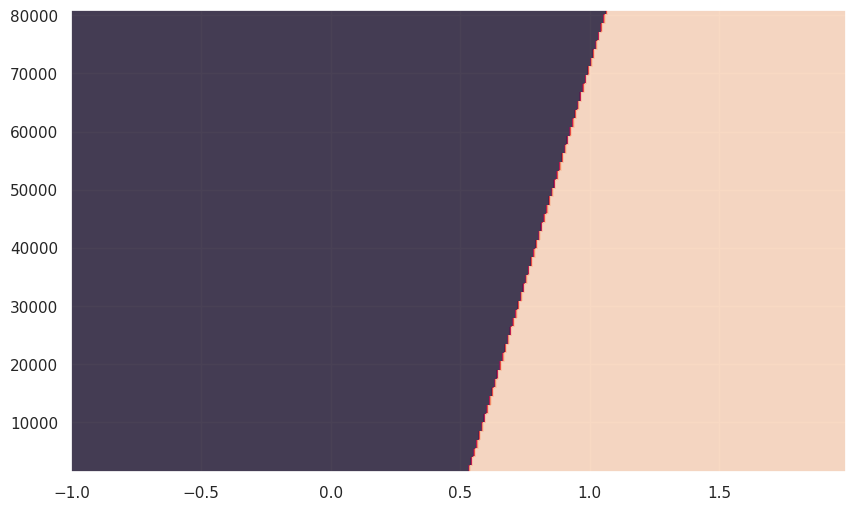

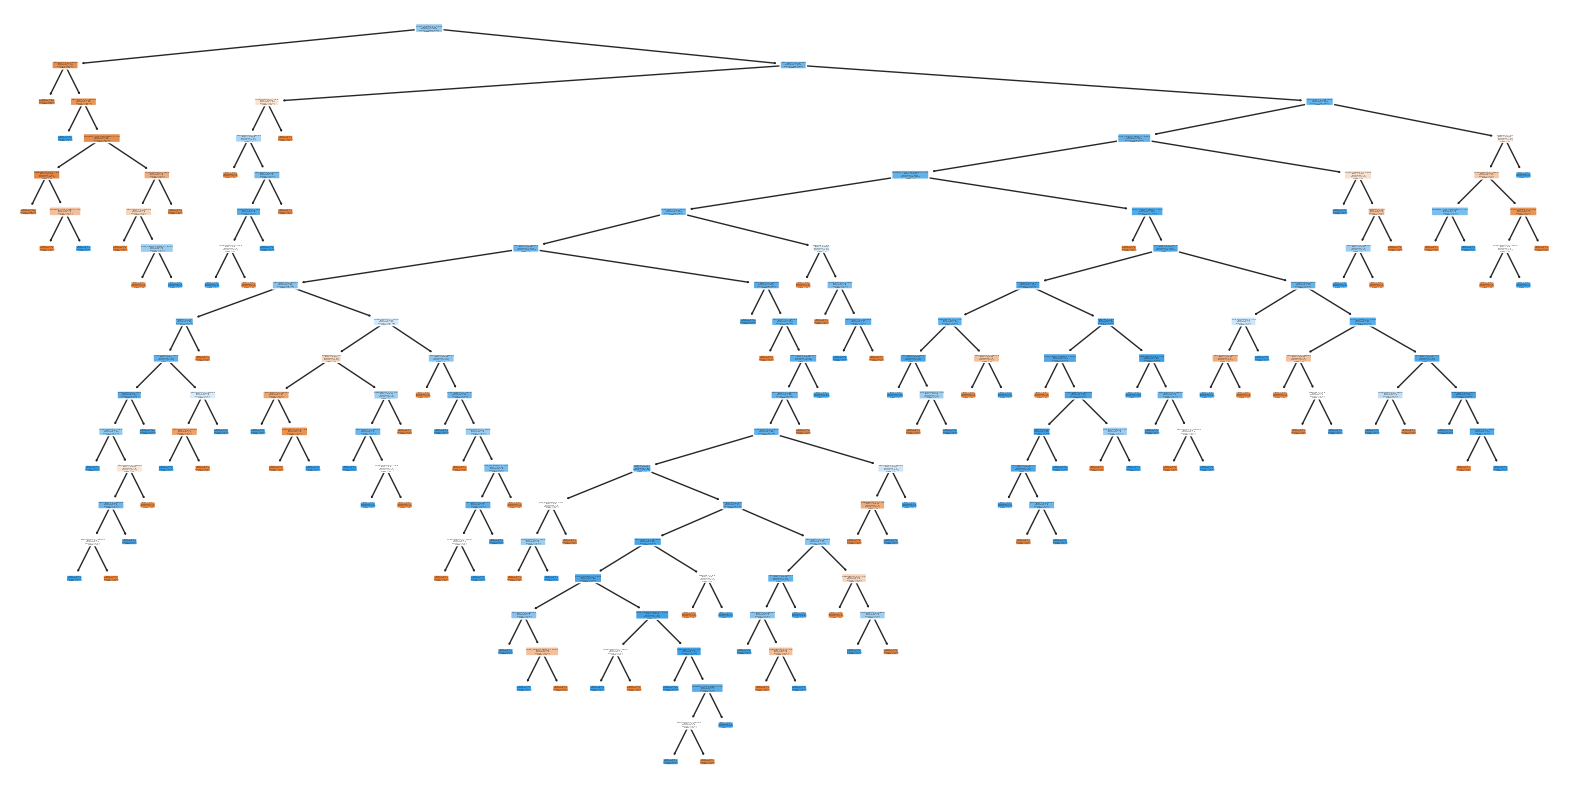

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123

Confusion Matrix:
[[20 23]
 [ 3 77]]
Accuracy Score: 0.7886178861788617

------------------------------------------------------------

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Confusion Matrix:
[[18 25]
 [ 4 76]]
Accuracy Score: 0.7642276422764228

------------------------------------------------------------

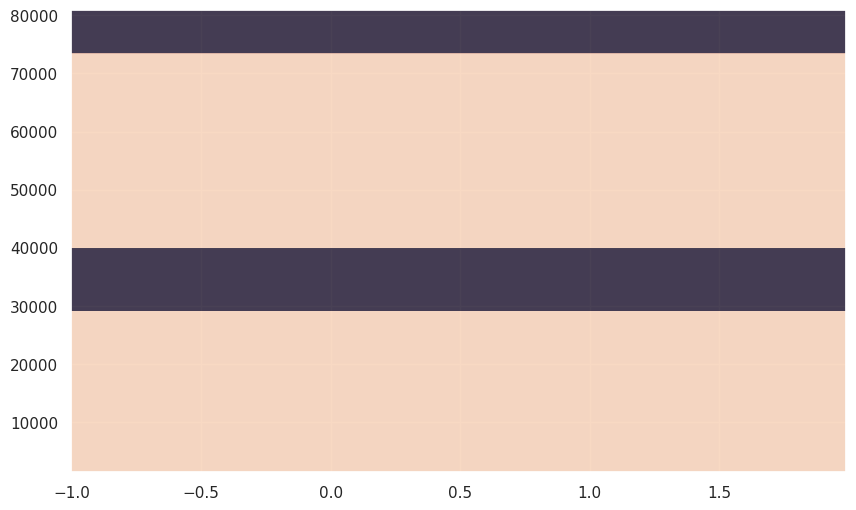

In [61]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = df['Loan_Status']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values after train-test split and impute if necessary
# This step addresses potential NaNs introduced during the split
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or any suitable strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Dictionary of models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42)
}

# Iterate over the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy Score: {accuracy}")
    print("\n" + "-"*60 + "\n")

    # Visualization for Decision Tree
    if model_name == "Decision Tree":
        plt.figure(figsize=(20,10))
        plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=["N", "Y"])
        plt.show()

    # Decision boundaries for Logistic Regression and SVM
    if model_name in ["Logistic Regression", "SVM"]:
        plt.figure(figsize=(10, 6))
        # Get the indices of the 'Credit_History' and 'TotalIncome' columns
        credit_history_index = X.columns.get_loc('Credit_History')
        total_income_index = X.columns.get_loc('TotalIncome')

        # Use NumPy integer indexing to select the columns
        X_vis = X_train[:, [credit_history_index, total_income_index]]
        y_vis = y_train
        model.fit(X_vis, y_vis)
        x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
        y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt